In [37]:
##Import Necessary Libraries
#data analysis libraries 
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings 
warnings.filterwarnings('ignore')

In [39]:
df=pd.read_csv("C:\\Users\\gverm\\Downloads\\titanic.csv")
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Numerical Features: Age (Continuous), Fare (Continuous), SibSp (Discrete), Parch (Discrete)
Categorical Features: Survived, Sex, Embarked, Pclass
Alphanumeric Features: Ticket, Cabin

In [41]:
# check missing values in train data
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [42]:
df.shape

(891, 12)

In [43]:
df["Age"].isnull().sum()

177

In [44]:
# percent of missing "Age" 
print('Percent of missing "Age" records is %.2f%%' %((df['Age'].isnull().sum()/df.shape[0])*100))

Percent of missing "Age" records is 19.87%


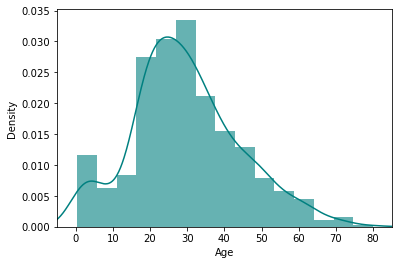

In [45]:
ax = df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
df["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-5,85)
plt.show()

Since "Age" is (right) skewed, using the mean might give us biased results by filling in ages that are older than desired. To deal with this, we'll use the median to impute the missing values.

In [46]:
# mean age
print('The mean of "Age" is %.2f' %(df["Age"].mean(skipna=True)))
# median age
print('The median of "Age" is %.2f' %(df["Age"].median(skipna=True)))

The mean of "Age" is 29.70
The median of "Age" is 28.00


In [47]:
# percent of missing "Cabin" 
print('Percent of missing "Cabin" records is %.2f%%' %((df['Cabin'].isnull().sum()/df.shape[0])*100))

Percent of missing "Cabin" records is 77.10%


In [48]:
# percent of missing "Embarked" 
print('Percent of missing "Embarked" records is %.2f%%' %((df['Embarked'].isnull().sum()/df.shape[0])*100))

Percent of missing "Embarked" records is 0.22%


Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):
S    644
C    168
Q     77
Name: Embarked, dtype: int64


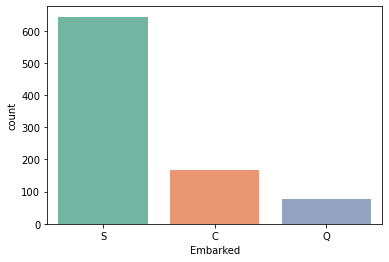

In [49]:
print('Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):')
print(df['Embarked'].value_counts())
sns.countplot(x='Embarked', data=df, palette='Set2')
plt.show()

In [50]:
print('The most common boarding port of embarkation is %s.' %df['Embarked'].value_counts().idxmax())  
#idxmax returns the id of maximum col 

The most common boarding port of embarkation is S.


In [51]:
train_data = df.copy()
train_data["Age"].fillna(df["Age"].median(skipna=True), inplace=True)
#train_data["Embarked"].fillna(df['Embarked'].value_counts().idxmax(), inplace=True)
mo=train_data["Embarked"].mode()
print(mo)
train_data["Embarked"].fillna(mo[0], inplace=True)
train_data.drop('Cabin', axis=1, inplace=True)

0    S
dtype: object


In [52]:
# check missing values in adjusted train data
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [53]:
## Create categorical variable for traveling alone

train_data['TravelAlone']=np.where((train_data["SibSp"]+train_data["Parch"])>0, 0, 1)
train_data.drop('SibSp', axis=1, inplace=True)
train_data.drop('Parch', axis=1, inplace=True)


In [54]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,TravelAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,1


In [55]:
training=pd.get_dummies(train_data, columns=["Pclass","Embarked","Sex"])
training.head()

,PassengerId,Survived,Name,Age,Ticket,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,0,0,0,1,0,0,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,0,1,0,0,1,0,0,1,0
2,3,1,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,1,0,0,1,0,0,1,1,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,53.1000,0,1,0,0,0,0,1,1,0
4,5,0,"Allen, Mr. William Henry",35.0,373450,8.0500,1,0,0,1,0,0,1,0,1


In [56]:
training.drop('Sex_female', axis=1, inplace=True)
training.drop('PassengerId', axis=1, inplace=True)
training.drop('Name', axis=1, inplace=True)
training.drop('Ticket', axis=1, inplace=True)

final_train = training
final_train.head()


,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,0,1,0,0,1,1
1,1,38.0,71.2833,0,1,0,0,1,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1


In [57]:
final_train.dtypes

Survived         int64
Age            float64
Fare           float64
TravelAlone      int32
Pclass_1         uint8
Pclass_2         uint8
Pclass_3         uint8
Embarked_C       uint8
Embarked_Q       uint8
Embarked_S       uint8
Sex_male         uint8
dtype: object

# Exploratory Data Analysis

In [58]:
#exploration of age 

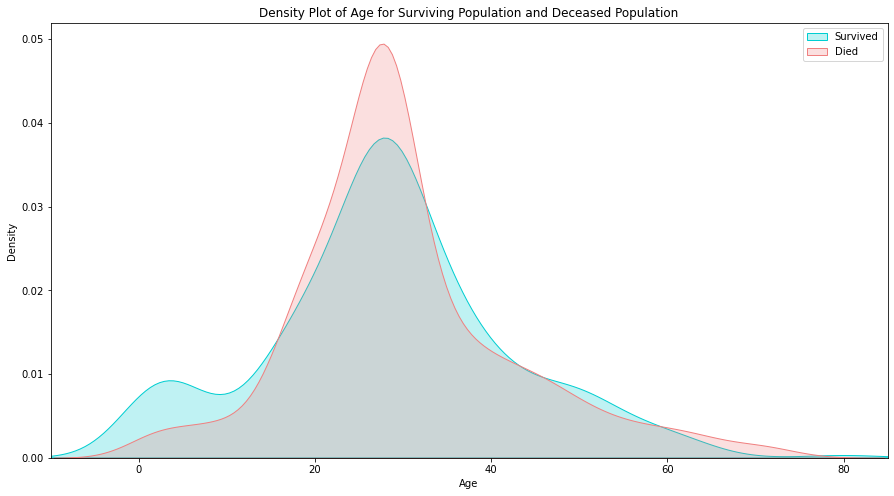

In [61]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_train["Age"][final_train.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(final_train["Age"][final_train.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

the age distribution for survivors and deceased is actually very similar. One notable difference is that, of the survivors, a larger proportion were children. The passengers evidently made an attempt to save children by giving them a place on the life rafts.

Considering the survival rate of passengers under 16, we'll also include another categorical variable in my dataset: "Minor"

In [62]:
final_train['IsMinor']=np.where(final_train['Age']<=16, 1, 0)

In [63]:
final_train.head(20)

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male,IsMinor
0,0,22.0,7.2500,0,0,0,1,0,0,1,1,0
1,1,38.0,71.2833,0,1,0,0,1,0,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1,0
5,0,28.0,8.4583,1,0,0,1,0,1,0,1,0
6,0,54.0,51.8625,1,1,0,0,0,0,1,1,0
7,0,2.0,21.0750,0,0,0,1,0,0,1,1,1
8,1,27.0,11.1333,0,0,0,1,0,0,1,0,0
9,1,14.0,30.0708,0,0,1,0,1,0,0,0,1


# Exploration of Fare

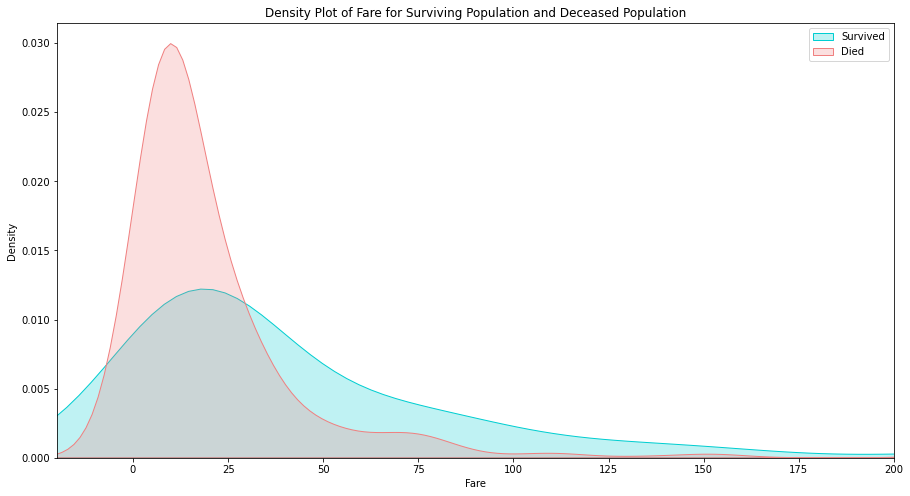

In [64]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_train["Fare"][final_train.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(final_train["Fare"][final_train.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()

As the distributions are clearly different for the fares of survivors vs. deceased, it's likely that this would be a significant predictor in our final model. Passengers who paid lower fare appear to have been less likely to survive. This is probably strongly correlated with Passenger Class, which we'll look at next.

# Exploration of Passenger Class

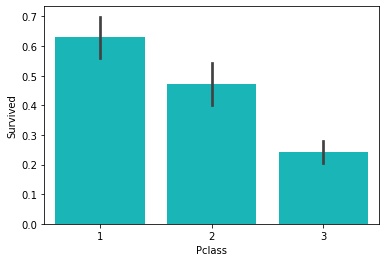

In [65]:
sns.barplot('Pclass', 'Survived', data=df, color="darkturquoise")
plt.show()

Unsurprisingly, being a first class passenger was safest.



# Exploration of Traveling Alone vs. With Family

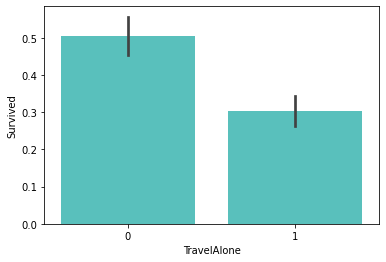

In [76]:
sns.barplot('TravelAlone', 'Survived', data=final_train, color="mediumturquoise")
plt.show()

Individuals traveling without family were more likely to die in the disaster than those with family aboard. Given the era, it's likely that individuals traveling alone were likely male

# Exploration of Gender Variable

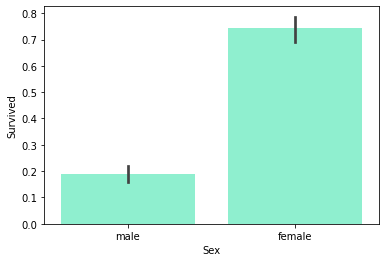

In [77]:
sns.barplot('Sex', 'Survived', data=df, color="aquamarine")
plt.show()

# Finding correlation

In [79]:
final_train.corr()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male,IsMinor
Survived,1.000000,-0.064910,0.257307,-0.203367,0.285904,0.093349,-0.322308,0.168240,0.003650,-0.149683,-0.543351,0.121485
Age,-0.064910,1.000000,0.096688,0.171647,0.323896,0.015831,-0.291955,0.030248,-0.031415,-0.006729,0.081163,-0.583515
Fare,0.257307,0.096688,1.000000,-0.271832,0.591711,-0.118557,-0.413333,0.269335,-0.117216,-0.162184,-0.182333,-0.004405
TravelAlone,-0.203367,0.171647,-0.271832,1.000000,-0.113364,-0.039070,0.129472,-0.095298,0.086464,0.029074,0.303646,-0.321665
Pclass_1,0.285904,0.323896,0.591711,-0.113364,1.000000,-0.288585,-0.626738,0.296423,-0.155342,-0.161921,-0.098013,-0.126463
Pclass_2,0.093349,0.015831,-0.118557,-0.039070,-0.288585,1.000000,-0.565210,-0.125416,-0.127301,0.189980,-0.064746,0.003066
Pclass_3,-0.322308,-0.291955,-0.413333,0.129472,-0.626738,-0.565210,1.000000,-0.153329,0.237449,-0.015104,0.137143,0.106466
Embarked_C,0.168240,0.030248,0.269335,-0.095298,0.296423,-0.125416,-0.153329,1.000000,-0.148258,-0.782742,-0.082853,0.001316
Embarked_Q,0.003650,-0.031415,-0.117216,0.086464,-0.155342,-0.127301,0.237449,-0.148258,1.000000,-0.499421,-0.074115,-0.020778
Embarked_S,-0.149683,-0.006729,-0.162184,0.029074,-0.161921,0.189980,-0.015104,-0.782742,-0.499421,1.000000,0.119224,0.011923


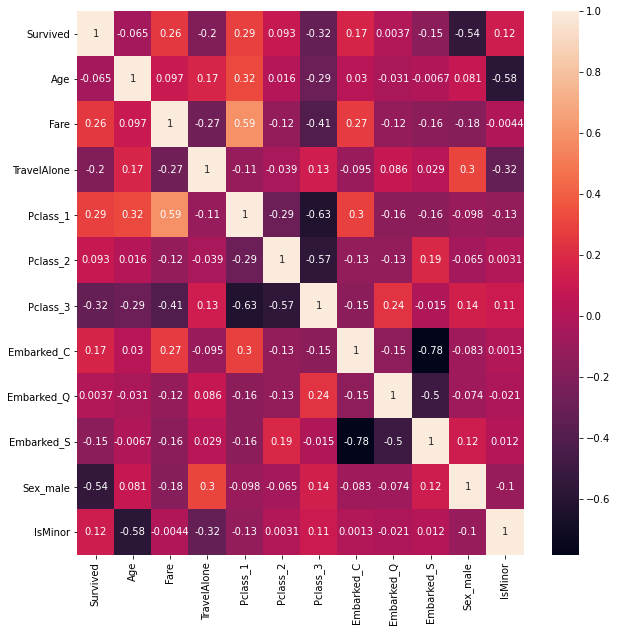

In [82]:
plt.figure(figsize=(10,10))
sns.heatmap(final_train.corr(), annot=True)
plt.show()

# Splitting data set